## Imports and Data Load

In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

In [2]:
positive = pd.read_excel("DatasetPositiveAll.xlsx")
negative = pd.read_excel("Dataset Negative T2T.xlsx")

## Classification Reports

In [3]:
labels = len(positive)*[1] + len(negative)*[0]
target_names = ['No', 'Yes']

In [4]:
count_q1 = pd.concat((positive.ANS_Q1.eq("YES"), negative.ANS_Q1.eq("YES"))).astype(int).values
count_q2 = pd.concat((positive.ANS_Q2.eq("YES"), negative.ANS_Q2.eq("YES"))).astype(int).values
count_q3 = pd.concat((positive.ANS_Q3.eq("YES"), negative.ANS_Q3.eq("YES"))).astype(int).values

In [5]:
def tp_tn_fp_fn(labels, preds):
    tp = len( [i for i in range(len(labels)) if labels[i]==1 and preds[i]==1] )
    tn = len( [i for i in range(len(labels)) if labels[i]==0 and preds[i]==0] )
    fp = len( [i for i in range(len(labels)) if labels[i]==0 and preds[i]==1] )
    fn = len( [i for i in range(len(labels)) if labels[i]==1 and preds[i]==0] )
    return tp, tn, fp, fn

In [6]:
print("Q1\n", "TP, TN, FP, FN:", tp_tn_fp_fn(labels, count_q1))
print("Q2\n", "TP, TN, FP, FN:", tp_tn_fp_fn(labels, count_q2))
print("Q3\n", "TP, TN, FP, FN:", tp_tn_fp_fn(labels, count_q3))

Q1
 TP, TN, FP, FN: (178, 30, 148, 12)
Q2
 TP, TN, FP, FN: (190, 73, 105, 0)
Q3
 TP, TN, FP, FN: (170, 91, 87, 20)


In [7]:
print(classification_report(labels, count_q1, target_names=target_names, digits=4))

              precision    recall  f1-score   support

          No     0.7143    0.1685    0.2727       178
         Yes     0.5460    0.9368    0.6899       190

    accuracy                         0.5652       368
   macro avg     0.6301    0.5527    0.4813       368
weighted avg     0.6274    0.5652    0.4881       368



In [8]:
print(classification_report(labels, count_q2, target_names=target_names, digits=4))

              precision    recall  f1-score   support

          No     1.0000    0.4101    0.5817       178
         Yes     0.6441    1.0000    0.7835       190

    accuracy                         0.7147       368
   macro avg     0.8220    0.7051    0.6826       368
weighted avg     0.8162    0.7147    0.6859       368



In [9]:
print(classification_report(labels, count_q3, target_names=target_names, digits=4))

              precision    recall  f1-score   support

          No     0.8198    0.5112    0.6298       178
         Yes     0.6615    0.8947    0.7606       190

    accuracy                         0.7092       368
   macro avg     0.7406    0.7030    0.6952       368
weighted avg     0.7381    0.7092    0.6973       368



In [10]:
count_def = pd.concat((positive['FILTER definitive'].eq("Pass"), negative['FILTER definitive'].eq("Pass"))).astype(int).values

In [11]:
print("Filter\n", "TP, TN, FP, FN:", tp_tn_fp_fn(labels, count_def))

Filter
 TP, TN, FP, FN: (166, 118, 60, 24)


In [12]:
print(classification_report(labels, count_def, target_names=target_names, digits=4))

              precision    recall  f1-score   support

          No     0.8310    0.6629    0.7375       178
         Yes     0.7345    0.8737    0.7981       190

    accuracy                         0.7717       368
   macro avg     0.7827    0.7683    0.7678       368
weighted avg     0.7812    0.7717    0.7688       368



In [13]:
print("ROC AUC SCORES:")
print("Q1: ", roc_auc_score(labels, count_q1, average="macro"))
print("Q2: ", roc_auc_score(labels, count_q2, average="macro"))
print("Q3: ", roc_auc_score(labels, count_q3, average="macro"))
print("Gen: ",roc_auc_score(labels, count_def, average="macro"))

ROC AUC SCORES:
Q1:  0.5526907155529273
Q2:  0.7050561797752809
Q3:  0.7029863985807215
Gen:  0.7683027794204613


---

## Metrics for NER stage

In [14]:
pos_pass = positive[ positive['FILTER definitive'] == "Pass" ]
pos_pass

,PMID,Title,Abstract,T5_Q1,ALPACA_Q1,LAMINI_Q1,Unnamed: 6,ANS_Q1,T5_Q2,ALPACA_Q2,...,AitsLab,Pruas,Combined words 2/4,PubTator_simplified,NER-TP,NER-FP,NER-FN,Prec,Rec,F1
1,37192172,Streptothricin F is a bactericidal antibiotic ...,The streptothricin natural product mixture (al...,<pad> yes</s>,"No, context: The streptothricin natural produc...",Yes.,2.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['carbamoylated gulosamine' 'guanine' 'hydroge...,['carbamoylated' 'carbapenem' 'guanine' 'hydro...,['carbapenem' 'guanine' 'gulosamine' 'hydrogen...,"['carbapenem', 'guanine', 'gulosamine', 'hydro...",12,2,0,0.857143,1.000000,0.923077
2,6258580,Interaction of pseudomonic acid A with Escheri...,Sodium pseudomonate was shown to be a powerful...,<pad> yes</s>,"No, context: Sodium pseudomonate was shown to ...",Yes.,2.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['[ 14c ] ile' '[ 14c ] isoleucine' 'amp' 'iso...,['[' 'amp' 'ile' 'isoleucine' 'pyrophosphate' ...,['[14c]isoleucine' 'amp' 'ile' 'isoleucine' 'p...,"['14c]ile', '[14c]isoleucine', 'amp', 'ile', '...",8,1,2,0.888889,0.800000,0.842105
3,16189117,"Efficacy of telavancin (TD-6424), a rapidly ba...","The efficacy of telavancin, a bactericidal lip...",<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,Yes,...,['linezolid' 'methicillin' 'telavancin' 'vanco...,['linezolid' 'methicillin' 'telavancin' 'vanco...,['linezolid' 'methicillin' 'telavancin' 'vanco...,"['linezolid', 'lipoglycopeptide', 'methicillin...",4,0,1,1.000000,0.800000,0.888889
4,13681272,Pharmacology of methicillin.,The pharmacology of a new antibiotic methicill...,<pad> yes</s>,"No, context: The pharmacology of a new antibio...",Yes.,2.0,YES,<pad> yes</s>,"Yes, the pharmacology of the new antibiotic me...",...,['6(2 : 6-dimethoxybenzamido)-penicillanic aci...,['6' 'methicillin' 'penicillin'],['6(2:6-dimethoxybenzamido)-penicillanic acid'...,['6(2:6-dimethoxybenzamido)-penicillanic acid'...,3,0,0,1.000000,1.000000,1.000000
5,5847736,Cephalothin. Its in vitro antibacterial spectr...,Of 655 bacterial strains isolated in a routine...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,Yes,...,['cephalothin'],['cephalothin'],['cephalothin'],['cephalothin'],1,0,0,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,30181560,Total synthesis and antimicrobial evaluation o...,Development of effective antimicrobial agents ...,<pad> yes</s>,"No, context: Development of effective antimicr...",Yes.,2.0,YES,<pad> yes</s>,Yes,...,['albomycin' 'albomycin i 2' 'albomycins' 'alb...,['albomycin' 'albomycins'],['albomycin' 'albomycin i 2' 'albomycins' 'alb...,"['albomycins', 'albomycins delta1 (1a), delta2...",3,1,2,0.750000,0.600000,0.666667
186,32424122,"Venturicidin A, A Membrane-active Natural Prod...",Despite the remarkable advances due to the dis...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,['aminoglycoside' 'atp' 'gentamicin' 'methicil...,"['methicillin', 'VentA', 'aminoglycoside', 'ge...",6,0,1,1.000000,0.857143,0.923077
187,20057515,"Walkmycin B targets WalK (YycG), a histidine k...",The WalK (a histidine kinase)/WalR (a response...,<pad> yes</s>,Yes,Yes.,3.0,YES,<pad> yes</s>,Yes,...,['be40665a' 'c(44)h(44)cl(2)o(14)' 'di-anthrac...,['be40665a' 'c' 'di' 'silica' 'walkmycin'],['be40665a' 'c(44)h(44)cl(2)o(14)' 'di-anthrac...,"['silica', 'C(44)H(44)Cl(2)O(14)', 'BE40665A.'...",6,0,0,1.000000,1.000000,1.000000
188,36071214,"Wychimicins, a new class of spirotetronate pol...",In the course of our screening program for new...,<pad> yes</s>,"No, context: In the course of our screening pr...",Yes.,2.0,YES,<pad> yes</s>,"Yes, there is a reference to the use of chemic...",...,['antibiotics' 'glycosidic' 'i2-d-xylo-hexopyr...,['i2' 'methicillin' 'spirocarbon' 'spirotetron

In [15]:
prec_mu = pos_pass['Prec'].dropna().astype(float).mean()
rec_mu = pos_pass['Rec'].dropna().astype(float).mean()
f1_mu = pos_pass['F1'].dropna().astype(float).mean()

print("Precision:", prec_mu)
print("Recall:", rec_mu)
print("F1 NER:", f1_mu)

Precision: 0.8288355415628144
Recall: 0.8495314458711589
F1 NER: 0.8232310833856945


In [16]:
prec_std = pos_pass['Prec'].dropna().astype(float).std()
rec_std = pos_pass['Rec'].dropna().astype(float).std()
f1_std = pos_pass['F1'].dropna().astype(float).std()

print("Precision:", prec_std)
print("Recall:", rec_std)
print("F1 NER:", f1_std)

Precision: 0.23980367551112602
Recall: 0.23323578956759394
F1 NER: 0.218120434148004


In [78]:
print( sum(pos_pass['Prec'] == 1) )
print( sum(pos_pass['Rec'] == 1) )
print( sum(pos_pass['F1'] == 1) )

89
93
62


In [79]:
print( sum(pos_pass['Prec'] < .1) )
print( sum(pos_pass['Rec'] < .1) )
print( sum(pos_pass['F1'] < .1) )

5
5
5


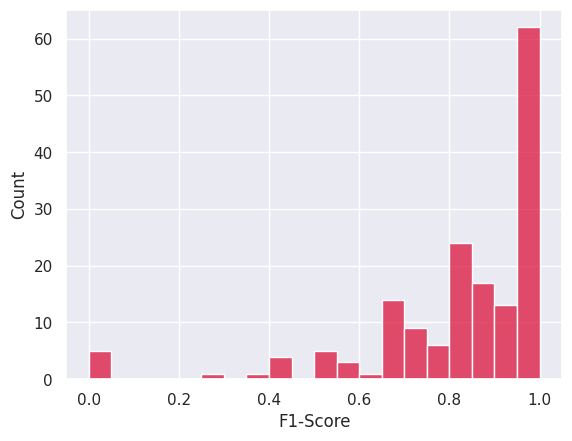

In [76]:
sns.set_theme()

sns.histplot(pos_pass['F1'].dropna().astype(float), binwidth=0.05, color='crimson').set_xlabel("F1-Score")
#plt.title("Distribution of F1 Scores")
plt.show()

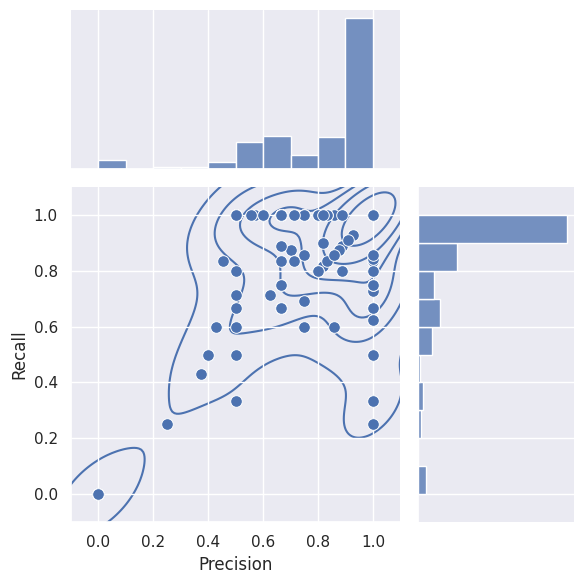

In [75]:
j = sns.jointplot(data=pos_pass[['Prec', 'Rec']], x='Prec', y='Rec',
                  ratio=2, xlim=(-.1,1.1), ylim=(-.1, 1.1),
                  joint_kws=dict(s=70), marginal_kws=dict(binwidth=0.1))
j.plot_joint(sns.kdeplot, color="b", zorder=0, levels=7)
j.set_axis_labels("Precision", "Recall")

#plt.title("Precision vs Recall")
plt.tight_layout()
plt.show()

In [77]:
pos_pass[["F1", "Prec", "Rec"]].corr()

,F1,Prec,Rec
F1,1.000000,0.871532,0.882655
Prec,0.871532,1.000000,0.570065
Rec,0.882655,0.570065,1.000000
